# Copula Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [228]:
rho = 0.5
Z2 = np.random.normal(size=(1000,2))
Z2[:,1] = Z2 @ np.array([rho, np.sqrt(1-rho**2)])

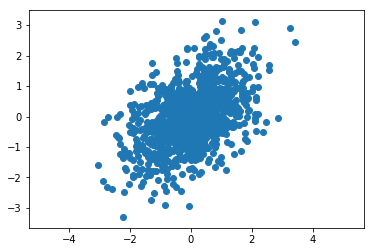

In [229]:
# Plot on the domain of normal distribution [-infty, infty]
plt.scatter(Z2[:,0], Z2[:,1])
plt.axis('equal')
plt.show()

In [230]:
U2 = ss.norm.cdf(Z2)

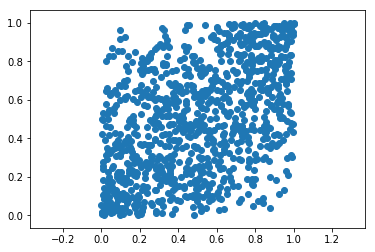

In [231]:
# Plot on the domain of uniform distribution [0,1]
plt.scatter(U2[:,0], U2[:,1])
plt.axis('equal')
plt.show()

In [232]:
# Now use the joint pair (U1, U2) pair to the default rate
lam = 3
default = -np.log(U2)/lam

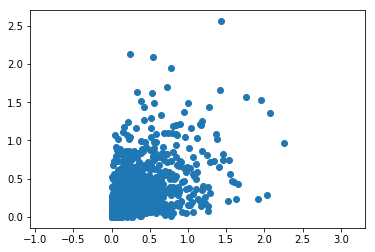

In [233]:
plt.scatter(default[:,0], default[:,1])
plt.axis('equal')
plt.show()

## We create a Gaussian copula function

In [148]:
def CopulaGaussian(n_var=2, n_sample=1000, rho=0.0):
    corr_mat = np.eye(n_var)*(1-rho) + rho
    chol_mat = np.linalg.cholesky(corr_mat)
    Z = np.random.normal(size=(n_sample, n_var)) @ chol_mat.transpose()
    U = ss.norm.cdf(Z)
    return U

In [149]:
U2 = CopulaGaussian(rho=0.0)

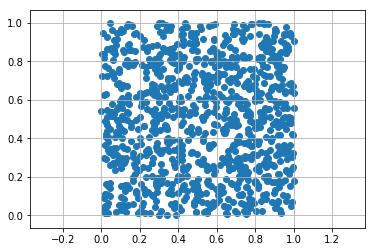

In [150]:
# Test the code
plt.scatter(U2[:,0], U2[:,1])
plt.axis('equal')
plt.grid()
plt.show()

# Simple CDE demo

* Assume that the individual loans have the default rate of 0.2 (20% of loans default every year)
* Let's package 10 loans into our CDO
* Create gaussian copula with rho = 0.5 vs 0.9
* Assume the maturity of our CDO is 1 year. 
* 60% is the senior tranche

In [209]:
# Gaussian copula 
lam = 0.2
n_sample=10000
U2 = CopulaGaussian(n_var=10, n_sample=n_sample, rho=0.5)

# Generate RNs for the default time
default_time = -np.log(U2)/lam

In [210]:
# Check that the average default time of the individual loans are around 5 years
print( np.mean(default_time, axis=0) )

# Compute the default ratio for the individual loans within 1 year
# it should be about 20%
print( np.sum(default_time < 1.0, axis=0) / n_sample )

[ 5.04184429  5.06806906  4.96775184  4.98485431  5.03685122  4.95854865
  5.02565461  5.00244628  5.03516156  5.00970923]
[ 0.1848  0.1773  0.1756  0.1753  0.1816  0.1815  0.1836  0.1803  0.1776
  0.1822]


In [211]:
# Count the total defaults in the pool within 1 year
default_total = np.sum(default_time < 1.0, axis=1)
print( default_total )

[6 1 0 ..., 0 0 2]


In [212]:
# Compute the percentage of the total default bigger than 6 
# that is same as the default rate of the senior tranche
sum(default_total > 6)/n_sample

0.058999999999999997

## When the correlation is high, the default rate of the senior tranche CDO is just as bas as the individual loans (sub-prime)